## Regresión Logística y Métodos de Aprendizaje no supervisado

In [30]:
import pandas as pd

df = pd.read_excel('../../res/tp4/acath.xlsx', sheet_name='acath')  # 3505 rows

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,0,73,132,268.0,1,1.0
1,0,68,85,120.0,1,1.0
2,0,54,45,NaN,1,0.0
3,1,58,86,245.0,0,0.0
4,1,56,7,269.0,0,0.0


In [31]:
import numpy as np

# Sanitize dataset
result_column = 'sigdz'
columns = ['sex', 'age', 'cad.dur', 'choleste', 'tvdlm']
numeric_columns = ['age', 'cad.dur', 'choleste', 'tvdlm']

# Replace numeric value for `sigdz` with logical value
df.replace({result_column: {1: 'T', 0: 'F'}}, inplace=True)
df.replace({'sex': {1: 'F', 0: 'M'}}, inplace=True)

# Replace NaN occurrences with mean
for column in numeric_columns:
    df.replace({column: {np.nan: int(df[column].mean())}}, inplace=True)

df.head()

,sex,age,cad.dur,choleste,sigdz,tvdlm
0,M,73,132,268.0,T,1.0
1,M,68,85,120.0,T,1.0
2,M,54,45,229.0,T,0.0
3,F,58,86,245.0,F,0.0
4,F,56,7,269.0,F,0.0


In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def train_model(data, fields, result_var, params=None):
    model = LogisticRegression()
    model.fit(data[fields], data[result_var])
    return model


model = train_model(train, numeric_columns, result_column)

In [34]:
predicted = model.predict(test[numeric_columns])

Población completa


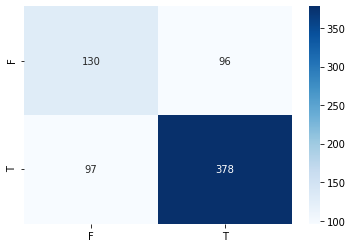

In [35]:
import seaborn as sns

def plot_confusion_matrix(data, result_var, predictions, title=None, ax=None):
    conf_mat = confusion_matrix(data[result_var], predictions)
    count_values = list(map(lambda x: sum(x), conf_mat))

    unique, counts = np.unique(np.array(data[result_var]), return_counts=True)
    count_labels = dict(zip(counts, unique))

    labels = []
    for value in count_values:
        labels.append(count_labels[value])

    if title is not None:
        print(title)

    if ax is None:
        sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    else:
        sns.heatmap(conf_mat, ax=ax, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

plot_confusion_matrix(test, result_column, predicted, title='Población completa')

In [36]:
print(classification_report(test[result_column], predicted))

              precision    recall  f1-score   support

           F       0.57      0.58      0.57       226
           T       0.80      0.80      0.80       475

    accuracy                           0.72       701
   macro avg       0.69      0.69      0.69       701
weighted avg       0.72      0.72      0.72       701



In [37]:
men = df[df.sex == 'M']
women = df[df.sex == 'F']

train_men, test_men = train_test_split(men, test_size=0.2)
train_women, test_women = train_test_split(women, test_size=0.2)

print(f'Hombres: {len(men)}\nMujeres: {len(women)}')

Hombres: 2405
Mujeres: 1099


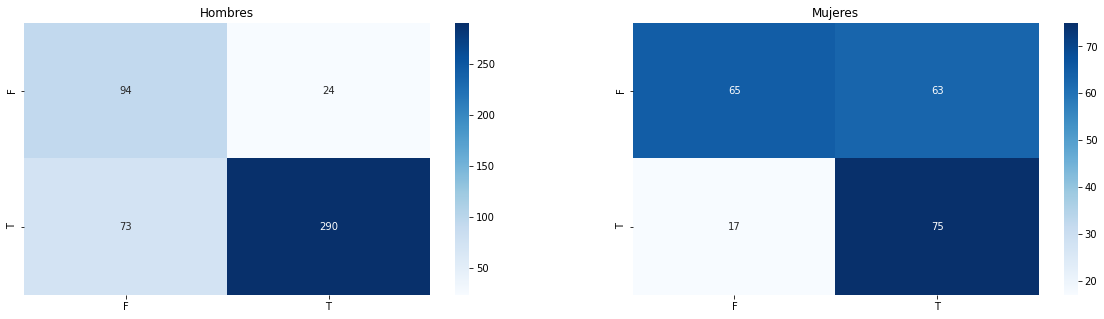

In [55]:
import matplotlib.pyplot as plt

model_men = train_model(train_men, numeric_columns, result_column)
model_women = train_model(train_women, numeric_columns, result_column)

predicted_men = model.predict(test_men[numeric_columns])
predicted_women = model.predict(test_women[numeric_columns])

tests = [test_men, test_women]
preds = [predicted_men, predicted_women]
titles = ['Hombres', 'Mujeres']

conf_mat_fig = plt.figure(figsize=(20,5))
i = 1
j = 2
k = 1
for test, pred, title in zip(tests, preds, titles):
    mat_ax = conf_mat_fig.add_subplot(i, j, k)
    mat_ax.set_title(title)
    plot_confusion_matrix(test, result_column, pred, ax=mat_ax)
    k += 1

In [60]:
for test, pred, title in zip(tests, preds, titles):
    print(title)
    print(classification_report(test[result_column], pred))

Hombres
              precision    recall  f1-score   support

           F       0.56      0.80      0.66       118
           T       0.92      0.80      0.86       363

    accuracy                           0.80       481
   macro avg       0.74      0.80      0.76       481
weighted avg       0.84      0.80      0.81       481

Mujeres
              precision    recall  f1-score   support

           F       0.79      0.51      0.62       128
           T       0.54      0.82      0.65        92

    accuracy                           0.64       220
   macro avg       0.67      0.66      0.64       220
weighted avg       0.69      0.64      0.63       220

